# Import Libraries

In [1]:
import os
from glob import glob
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

2023-09-13 08:46:59.434 python[1851:96446] apply_selection_policy_once: avoid use of removable GPUs (via (null):GPUSelectionPolicy->avoidRemovable)


# Paths

In [2]:
neg_patch_path = "/Users/mah_prince/Thesis/Azam Sir/Colon Cancer/Code/test_tf_project/Colonoscopy_tissue_segment_dataset/neg_patch"
mask_patch_path = "/Users/mah_prince/Thesis/Azam Sir/Colon Cancer/Code/test_tf_project/Colonoscopy_tissue_segment_dataset/pos_mask_patch"
tissue_patch_path = "/Users/mah_prince/Thesis/Azam Sir/Colon Cancer/Code/test_tf_project/Colonoscopy_tissue_segment_dataset/pos_patch"

# Check Various Patch

Total Number of Patches
Negative: 35821
Mask: 6352
Tissue: 6352
-------------------------
18-00530B_2019-05-07 23_56_22-lv1-11712-16122-7372-7686_Patch_165.jpg
18-00530B_2019-05-07 23_56_22-lv1-11712-16122-7372-7686_mask_Patch_165.jpg
Negative
1800769002_2019-06-11 13_32_47-lv1-36878-15878-2411-4096_Patch_14.jpg
-------------------------
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)


IndexError: index 2 is out of bounds for axis 0 with size 2

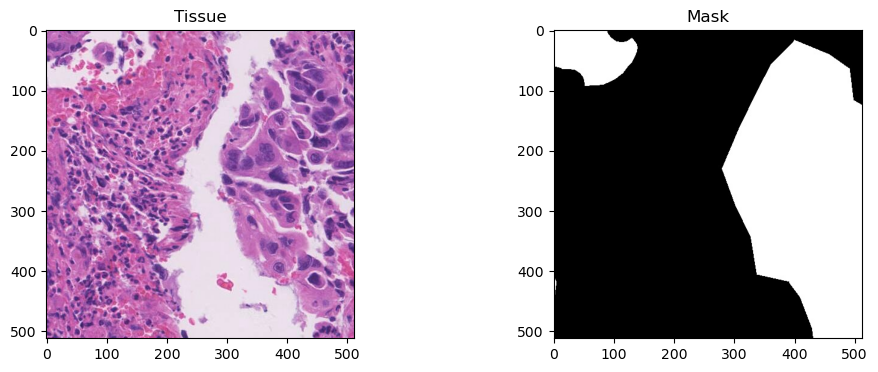

In [3]:
neg_patches = glob(os.path.join(neg_patch_path, '*'))
mask_patches = glob(os.path.join(mask_patch_path, '*'))
tissue_patches = glob(os.path.join(tissue_patch_path, '*'))

print("Total Number of Patches")
print(f"Negative: {len(neg_patches)}")
print(f"Mask: {len(mask_patches)}")
print(f"Tissue: {len(tissue_patches)}")

print("-------------------------")

neg_patches = sorted(neg_patches)
mask_patches = sorted(mask_patches)
tissue_patches = sorted(tissue_patches)

print(os.path.basename(tissue_patches[5]))
print(os.path.basename(mask_patches[5]))
print("Negative")
print(os.path.basename(neg_patches[5]))

print("-------------------------")

tissue_img = cv2.imread(tissue_patches[0])
tissue_img = cv2.cvtColor(tissue_img, cv2.COLOR_BGR2RGB)

mask_img = cv2.imread(mask_patches[0])
mask_img = cv2.cvtColor(mask_img, cv2.COLOR_BGR2RGB)

neg_img = cv2.imread(neg_patches[0])
neg_img = cv2.cvtColor(neg_img, cv2.COLOR_BGR2RGB)

#Verify (tissue, mask) shape
print(tissue_img.shape)
print(mask_img.shape)
print(neg_img.shape)


#Plot (tissue, mask) side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot the first image on the left subplot
axes[0].imshow(cv2.cvtColor(tissue_img, cv2.COLOR_BGR2RGB))
axes[0].set_title('Tissue')

# Plot the second image on the right subplot
axes[1].imshow(cv2.cvtColor(mask_img, cv2.COLOR_BGR2RGB))
axes[1].set_title('Mask')

# Plot the third image on the right subplot
axes[2].imshow(cv2.cvtColor(neg_img, cv2.COLOR_BGR2RGB))
axes[2].set_title('Negative')
plt.show()


# Plot Histogram and Patch

## Function for Plotting Histogram

In [16]:
def plot_hist(img):
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    plt.figure(figsize=(8, 6))
    plt.hist(img.ravel(), 256, [0, 256])
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.title('Histogram of Patch')
    plt.grid(True)
    plt.show()

## Negative Patch

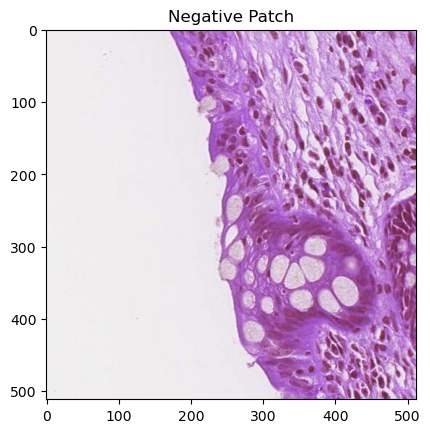

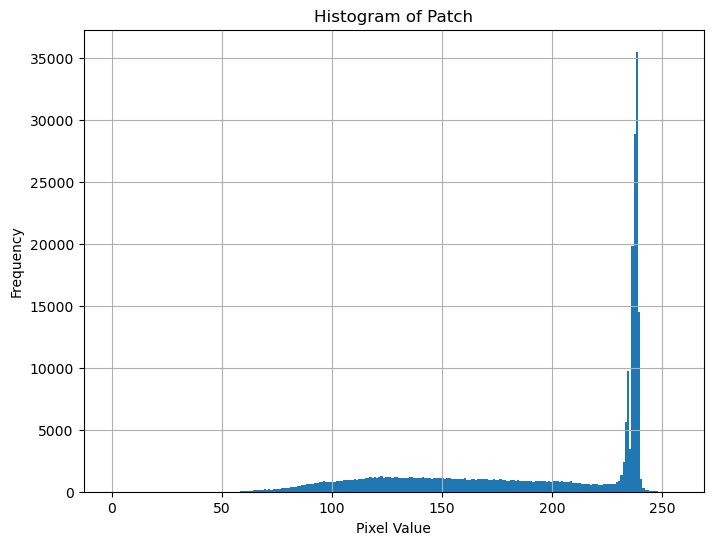

In [17]:
img = cv2.imread(neg_patches[9])
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)



plt.imshow(img_rgb)
plt.title("Negative Patch")
plot_hist(img_gray)

## Positive Tissue Patch

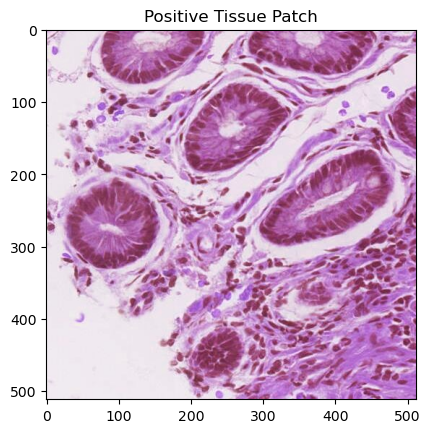

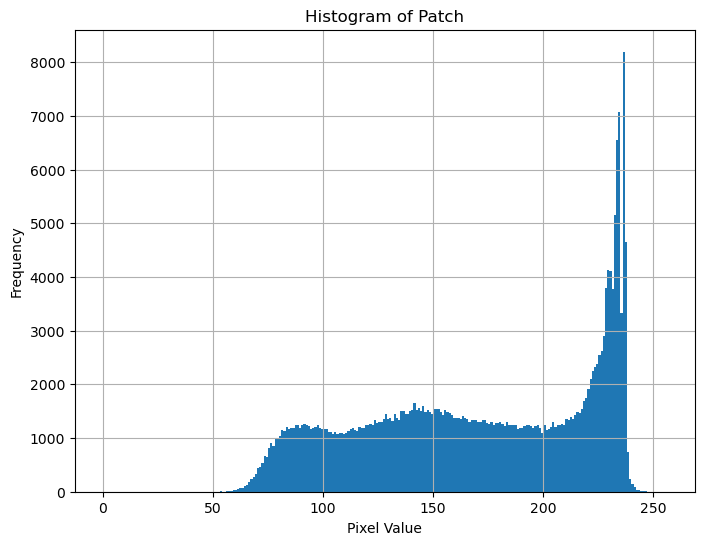

In [18]:
img = cv2.imread(tissue_patches[9])
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)



plt.imshow(img_rgb)
plt.title("Positive Tissue Patch")
plot_hist(img_gray)

## Mask Patch

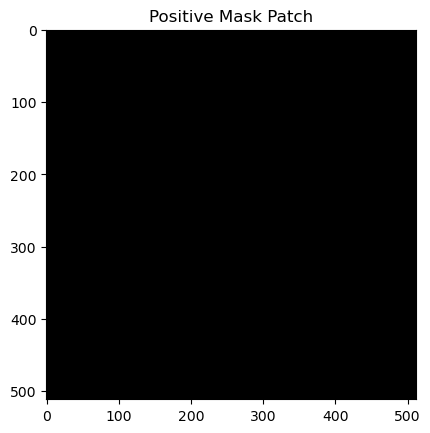

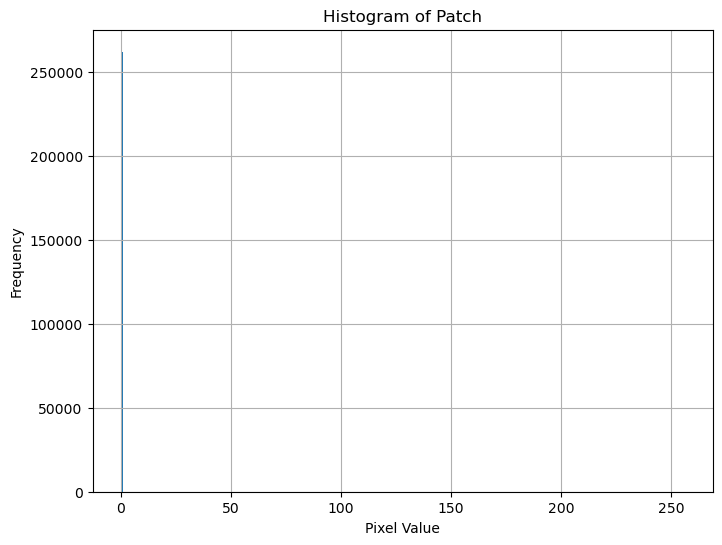

In [19]:
img = cv2.imread(mask_patches[9])
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)



plt.imshow(img_rgb)
plt.title("Positive Mask Patch")
plot_hist(img_gray)

# Remove Low Cancerous Patch

## Function to Find Low Cancer Patch

In [20]:
def find_low_cancer(mask_patch_path_list):
    count = 0
    low_cancer_file_list = []

    for patch_path in mask_patch_path_list:
        img = cv2.imread(patch_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        (h, w, c) = img.shape
        total_pixels = h*w*c
        cancerous_pixels = np.count_nonzero(img)

        percentage = (cancerous_pixels / total_pixels) * 100
        if percentage < 25.0:
            count += 1
            low_cancer_file_list.append(patch_path)

    print(f"Total Low Cancerous Region Patch: {count}")

    return count, low_cancer_file_list

## Function to Delete Low Cancer Patch

In [21]:
def delete_low_cancer(path_list):
    count = 0
    err_count = 0
    for path in path_list:
        try:
            # Attempt to delete the file
            os.remove(path)
            count += 1
            # print(f"{os.path.basename(path)} has been deleted.")
        except FileNotFoundError:
            print(f"{os.path.basename(path)} does not exist.")
            err_count += 1
        except Exception as e:
            print(f"An error occurred: {str(e)}")
            err_count += 1

    print(f"Deleted {count} patches")
    print(f"Error Deleting {err_count} patches")

## Verify Functions

In [22]:
low_cancer_count, low_cancer_path_list = find_low_cancer(mask_patches)
print(low_cancer_count)
print(len(low_cancer_path_list))

Total Low Cancerous Region Patch: 27570
27570
27570


In [23]:
low_cancer_path_list[:2]

['/Users/mah_prince/Thesis/Azam Sir/Colon Cancer/Code/test_tf_project/Colonoscopy_tissue_segment_dataset/pos_mask_patch/18-00530B_2019-05-07 23_56_22-lv1-11712-16122-7372-7686_mask_Patch_1.jpg',
 '/Users/mah_prince/Thesis/Azam Sir/Colon Cancer/Code/test_tf_project/Colonoscopy_tissue_segment_dataset/pos_mask_patch/18-00530B_2019-05-07 23_56_22-lv1-11712-16122-7372-7686_mask_Patch_10.jpg']

## Remove Mask Patch

In [28]:
# delete_low_cancer(low_cancer_path_list)

## Remove Positive Tissue Patch

In [29]:
# Substring to be removed
substring_to_remove = "mask_"

print(low_cancer_path_list[:2])

# Remove the substring from each string in the list
tissue_patches_delete = [string.replace(substring_to_remove, '') for string in low_cancer_path_list]

# Print the resulting list
# for modified_string in tissue_patches_delete:
#     print(modified_string)

print(tissue_patches_delete[:2])

['/Users/mah_prince/Thesis/Azam Sir/Colon Cancer/Code/test_tf_project/Colonoscopy_tissue_segment_dataset/pos_mask_patch/18-00530B_2019-05-07 23_56_22-lv1-11712-16122-7372-7686_mask_Patch_1.jpg', '/Users/mah_prince/Thesis/Azam Sir/Colon Cancer/Code/test_tf_project/Colonoscopy_tissue_segment_dataset/pos_mask_patch/18-00530B_2019-05-07 23_56_22-lv1-11712-16122-7372-7686_mask_Patch_10.jpg']
['/Users/mah_prince/Thesis/Azam Sir/Colon Cancer/Code/test_tf_project/Colonoscopy_tissue_segment_dataset/pos_patch/18-00530B_2019-05-07 23_56_22-lv1-11712-16122-7372-7686_Patch_1.jpg', '/Users/mah_prince/Thesis/Azam Sir/Colon Cancer/Code/test_tf_project/Colonoscopy_tissue_segment_dataset/pos_patch/18-00530B_2019-05-07 23_56_22-lv1-11712-16122-7372-7686_Patch_10.jpg']


In [30]:
tissue_patches[:2]

['/Users/mah_prince/Thesis/Azam Sir/Colon Cancer/Code/test_tf_project/Colonoscopy_tissue_segment_dataset/pos_patch/18-00530B_2019-05-07 23_56_22-lv1-11712-16122-7372-7686_Patch_1.jpg',
 '/Users/mah_prince/Thesis/Azam Sir/Colon Cancer/Code/test_tf_project/Colonoscopy_tissue_segment_dataset/pos_patch/18-00530B_2019-05-07 23_56_22-lv1-11712-16122-7372-7686_Patch_10.jpg']

## Remove Positive Patches

In [31]:
# delete_low_cancer(tissue_patches_delete)

Deleted 27570 patches
Error Deleting 0 patches


# Explore Preprocessed Dataset

In [34]:
mask_patches = glob(os.path.join(mask_patch_path, '*'))
tissue_patches = glob(os.path.join(tissue_patch_path, '*'))

print("Total Number of Patches")
print(f"Mask: {len(mask_patches)}")
print(f"Tissue: {len(tissue_patches)}")

print("----------------")

mask_patches = sorted(mask_patches)
tissue_patches = sorted(tissue_patches)

print("Tissue:")
print(tissue_patches[:4])
print("-----------------------------------")
print("Mask")
print(mask_patches[:4])

Total Number of Patches
Mask: 6352
Tissue: 6352
----------------
Tissue:
['/Users/mah_prince/Thesis/Azam Sir/Colon Cancer/Code/test_tf_project/Colonoscopy_tissue_segment_dataset/pos_patch/18-00530B_2019-05-07 23_56_22-lv1-11712-16122-7372-7686_Patch_150.jpg', '/Users/mah_prince/Thesis/Azam Sir/Colon Cancer/Code/test_tf_project/Colonoscopy_tissue_segment_dataset/pos_patch/18-00530B_2019-05-07 23_56_22-lv1-11712-16122-7372-7686_Patch_151.jpg', '/Users/mah_prince/Thesis/Azam Sir/Colon Cancer/Code/test_tf_project/Colonoscopy_tissue_segment_dataset/pos_patch/18-00530B_2019-05-07 23_56_22-lv1-11712-16122-7372-7686_Patch_152.jpg', '/Users/mah_prince/Thesis/Azam Sir/Colon Cancer/Code/test_tf_project/Colonoscopy_tissue_segment_dataset/pos_patch/18-00530B_2019-05-07 23_56_22-lv1-11712-16122-7372-7686_Patch_163.jpg']
-----------------------------------
Mask
['/Users/mah_prince/Thesis/Azam Sir/Colon Cancer/Code/test_tf_project/Colonoscopy_tissue_segment_dataset/pos_mask_patch/18-00530B_2019-05-07 